In [9]:
import pickle
with open("/work/dlclarge2/sukthank-nanogpt/nanoGPT/stats_all.pkl","rb") as f:
    stats_all = pickle.load(f)

In [10]:
params_acc = {}
for key, value in stats_all.items():
    params_acc[value["num_params"]] = min(value["val_losses"])

Text(0, 0.5, 'Validation loss')

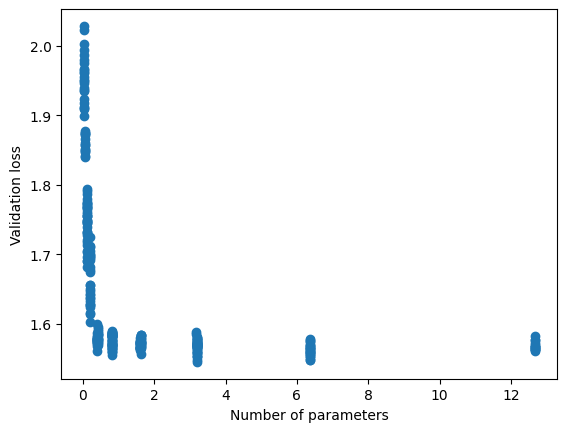

In [14]:
import matplotlib.pyplot as plt
plt.scatter(params_acc.keys(), params_acc.values())
plt.xlabel("Number of parameters")
plt.ylabel("Validation loss")

In [18]:
activation_acc = {}
activation_acc[0] = []
activation_acc[1] = []
activation_acc[2] = []
activation_acc[3] = []
for key, value in stats_all.items():
    for i in value["activation_id"]:
         activation_acc[i].append(min(value["val_losses"]))

In [23]:
activations = []
activation_ids_mean = []
acts = ["nn.ReLU()", "nn.GELU()", "SiLUActivation()", "new_gelu"]
import numpy as np
for k in activation_acc.keys():
    activations.append(acts[k])
    activation_ids_mean.append(np.mean(activation_acc[k]))

Text(0, 0.5, 'Activation ids mean')

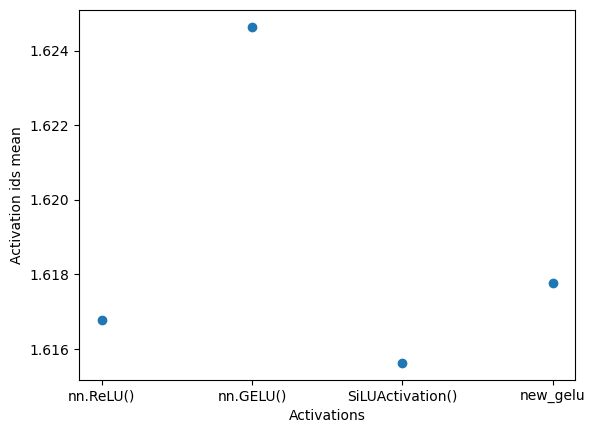

In [25]:
import matplotlib.pyplot as plt
plt.scatter(activations, activation_ids_mean)
plt.xlabel("Activations")
plt.ylabel("Activation ids mean")

In [32]:
embed_dims = [32, 64, 128, 256]
embed_dim = {}
for e in embed_dims:
    embed_dim[e] = []
for key, value in stats_all.items():
    embed_dim[value["n_embd"]].append(min(value["val_losses"]))

In [34]:
embed_dim_mean = []
for k in embed_dim.keys():
    embed_dim_mean.append(np.mean(embed_dim[k]))

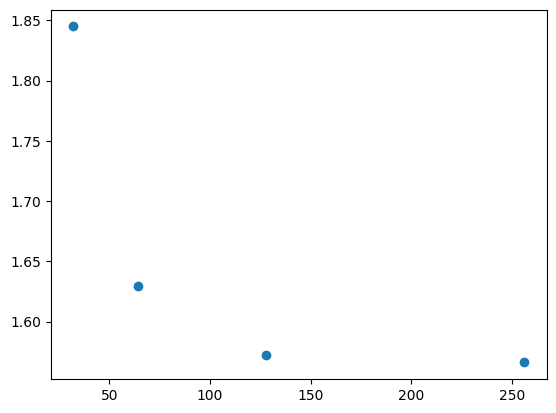

In [36]:
import matplotlib.pyplot as plt
# Larger embed dim always better
plt.scatter(embed_dim.keys(), embed_dim_mean)

In [37]:
n_layer = [2, 4, 8, 16]
n_layers = {}
for l in n_layer:
    n_layers[l] = []
for key, value in stats_all.items():
    n_layers[value["n_layer"]].append(min(value["val_losses"]))

In [38]:
n_layers_mean = []
for k in n_layers.keys():
    n_layers_mean.append(np.mean(n_layers[k]))

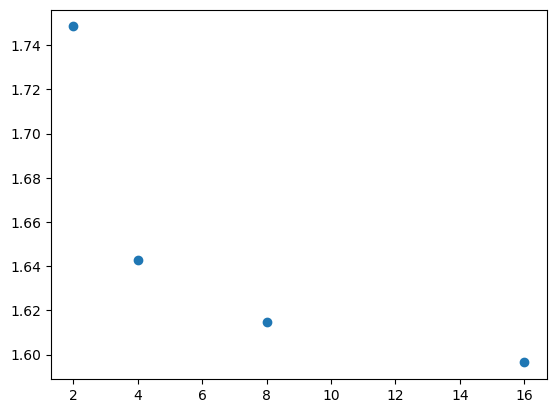

In [39]:
import matplotlib.pyplot as plt
# More layers always better
plt.scatter(n_layers.keys(), n_layers_mean)

In [46]:
n_head = [2, 4, 8, 16]
n_heads = {}
for l in n_layer:
    n_heads[l] = []
for key, value in stats_all.items():
    for h in value["n_head"]:
        n_heads[h].append(min(value["val_losses"]))

In [47]:
n_heads_mean = []
for k in n_heads.keys():
    n_heads_mean.append(np.mean(n_heads[k]))

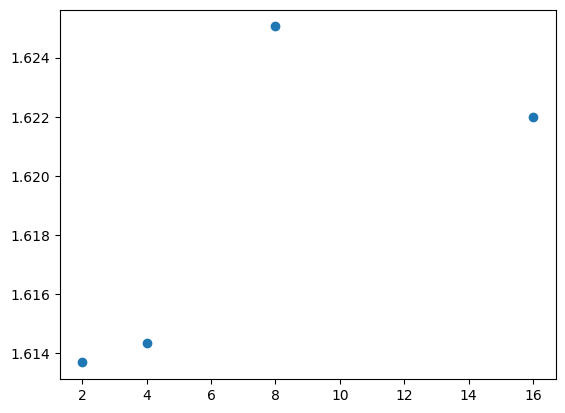

In [49]:
import matplotlib.pyplot as plt
# Fewer heads seem to be better, but differences are minor
plt.scatter(n_heads.keys(), n_heads_mean)